
# Подготовка исходных данных

Сгенерировать исходные данные для обучения модели машинного обучения.

Значения параметров выбираются из таблицы "Варианты".docx в соответствие с номером по списку группы в СДО.

In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 265,
                           n_features = 2,
                           n_classes = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           class_sep = 0.35,
                           random_state = 20)

Разделить выборку на обучающую и тестовую.

Использовать параметр `random_state` в соответствие со своим вариантом.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Обучение модели

Обучить модель линейной логистической регрессии на обучающей выборке.

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Функции

Написать функцию для расчета сигмоиды.

In [4]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Написать функцию для расчета логарифмической ошибки (logloss).

In [5]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted = np.maximum(np.minimum(y_predicted, 1 - epsilon), epsilon)
    return -np.mean(y_true*np.log(y_predicted) + (1 - y_true)*np.log(1 - y_predicted))

Написать функцию расчета градиента логарифмической ошибки (logloss).

In [6]:
def log_loss_derivative(y_true, y_predicted):
    return -np.mean((y_true - y_predicted) / (y_predicted*(1 - y_predicted)))

Написать функцию обучения модели логистической регресии методом градиентного спуска.

In [7]:
def logistic_regression_gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape

    # Initialize weights
    weights = np.zeros((num_features, 1))

    # Perform gradient descent
    for i in range(num_iterations):
        # Calculate predictions
        predictions = sigmoid(np.dot(X, weights))

        # Calculate error
        error = predictions - y

        # Update weights
        gradient = np.dot(X.T, error)
        weights -= learning_rate / num_samples * gradient

    return weights

Построить кривую обучения и оценить рациональное количество итераций алгоритма градиентного спуска.

100%|██████████| 500/500 [00:00<00:00, 1836.16it/s]


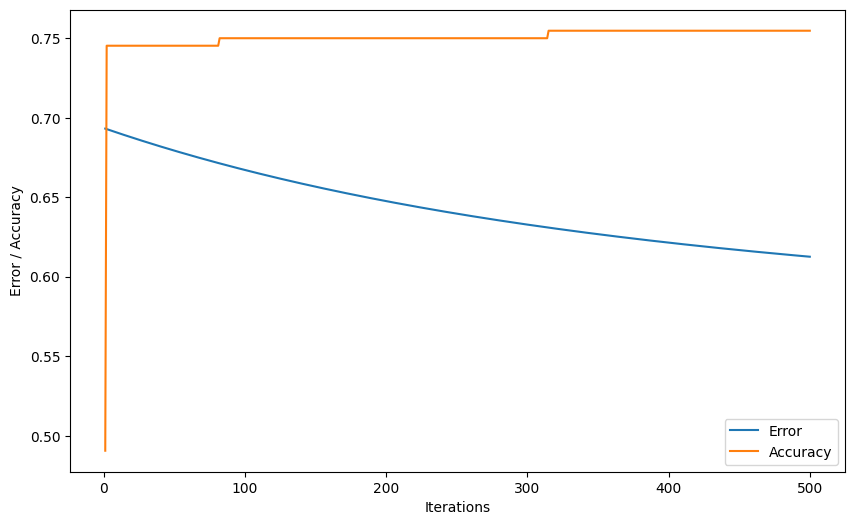

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm

num_iterations = 500
learning_rate = 0.01
weights = np.zeros((X_train.shape[1], 1))
errors = []
accuracy = []

# Perform gradient descent
for i in tqdm(range(num_iterations)):
    # Calculate predictions
    predictions = sigmoid(np.dot(X_train, weights))

    # Calculate error
    error = predictions - np.expand_dims(y_train, axis=-1)
    errors.append(log_loss(y_train, predictions.flatten()))

    # Calculate accuracy
    y_pred = np.where(predictions > 0.5, 1, 0)
    accuracy.append(accuracy_score(y_train, y_pred.flatten()))

    # Update weights
    gradient = np.dot(X_train.T, error)
    weights -= learning_rate / X_train.shape[0] * gradient

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the error
ax.plot(range(1, num_iterations + 1), errors, label='Error')
ax.plot(range(1, num_iterations + 1), accuracy, label='Accuracy')

# Set labels and legend
ax.set_xlabel('Iterations')
ax.set_ylabel('Error / Accuracy')
ax.legend()

plt.show()

Обучить модель логистической регрессии на данных обучающей выборки с использованием написанной функции и вывести значения коэффициентов модели.

In [9]:
def logistic_regression_gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape

    # Initialize weights
    weights = np.zeros((num_features, 1))

    # Perform gradient descent
    for i in range(num_iterations):
        # Calculate predictions
        predictions = sigmoid(np.dot(X, weights))

        # Calculate error
        error = predictions - y.reshape(-1, 1)

        # Update weights
        gradient = np.dot(X.T, error)
        weights -= learning_rate / num_samples * gradient

    return weights

weights = logistic_regression_gradient_descent(X_train, y_train.reshape(-1, 1), learning_rate=0.01, num_iterations=500)
print('Weights:', weights)

Weights: [[0.60239229]
 [0.15893152]]


## Sklearn

Обучить модель логистической регрессии с использованием библиотеки `sklearn`.

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Вывести коэффициенты модели.

In [11]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[1.56300802 0.61741646]]
Intercept: [0.02647638]


Сравнить с коэффициентами, полученными на основе использования написанной функции градиентного спуска.

In [12]:
print("Weights from gradient descent function: ", weights)
print("Coefficients from sklearn: ", model.coef_)

Weights from gradient descent function:  [[0.60239229]
 [0.15893152]]
Coefficients from sklearn:  [[1.56300802 0.61741646]]


Вычислить вероятности принадлежности объектов к классам.

In [13]:
# Get the probabilities of assignment to classes
probabilities = model.predict_proba(X_test)
print("Probabilities:", probabilities)

Probabilities: [[0.28231639 0.71768361]
 [0.56514594 0.43485406]
 [0.42919007 0.57080993]
 [0.32949662 0.67050338]
 [0.72926068 0.27073932]
 [0.40588333 0.59411667]
 [0.57351591 0.42648409]
 [0.59154326 0.40845674]
 [0.30099822 0.69900178]
 [0.17004328 0.82995672]
 [0.16542019 0.83457981]
 [0.64667094 0.35332906]
 [0.1401836  0.8598164 ]
 [0.51940572 0.48059428]
 [0.25269653 0.74730347]
 [0.51735476 0.48264524]
 [0.9838963  0.0161037 ]
 [0.33469487 0.66530513]
 [0.70407816 0.29592184]
 [0.61654931 0.38345069]
 [0.12037542 0.87962458]
 [0.43247237 0.56752763]
 [0.39495378 0.60504622]
 [0.90011774 0.09988226]
 [0.67309858 0.32690142]
 [0.28499981 0.71500019]
 [0.25094967 0.74905033]
 [0.53542124 0.46457876]
 [0.56698232 0.43301768]
 [0.65362995 0.34637005]
 [0.41732015 0.58267985]
 [0.12610172 0.87389828]
 [0.19847785 0.80152215]
 [0.57249286 0.42750714]
 [0.45687696 0.54312304]
 [0.99405581 0.00594419]
 [0.41395337 0.58604663]
 [0.5698096  0.4301904 ]
 [0.40356857 0.59643143]
 [0.438943

Вычислить предсказанные метки классов для обучающей выборки.

In [14]:
y_pred_train = model.predict(X_train)

# Оценивание качества модели

## Матрица ошибок

С использованием класса `ConfusionMatrix` библиотеки `yellowbrick` построить матрицу ошибок для обучающей выборки.


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Libera

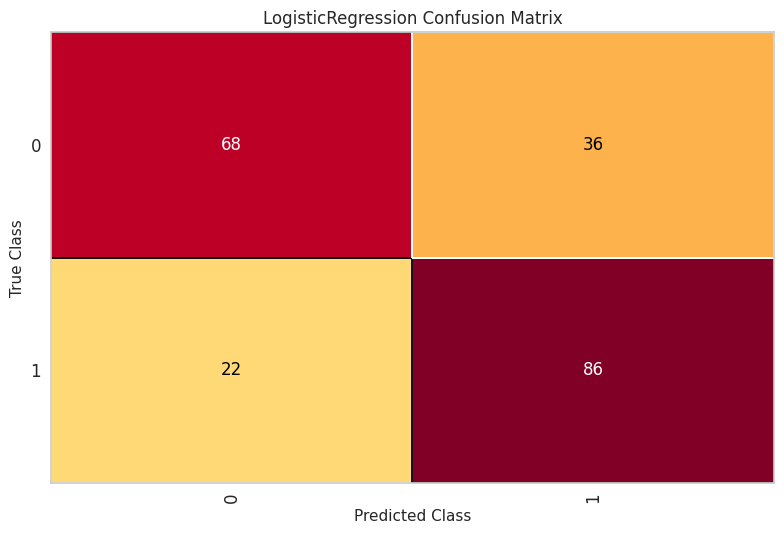

<AxesSubplot: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [15]:
!pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix

model = LogisticRegression()
viz = ConfusionMatrix(model, classes=[0, 1])

viz.fit(X_train, y_train)
viz.score(X_train, y_train)
viz.show()

С использованием класса `ConfusionMatrix` библиотеки `yellowbrick` построить матрицу ошибок для тестовой выборки.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

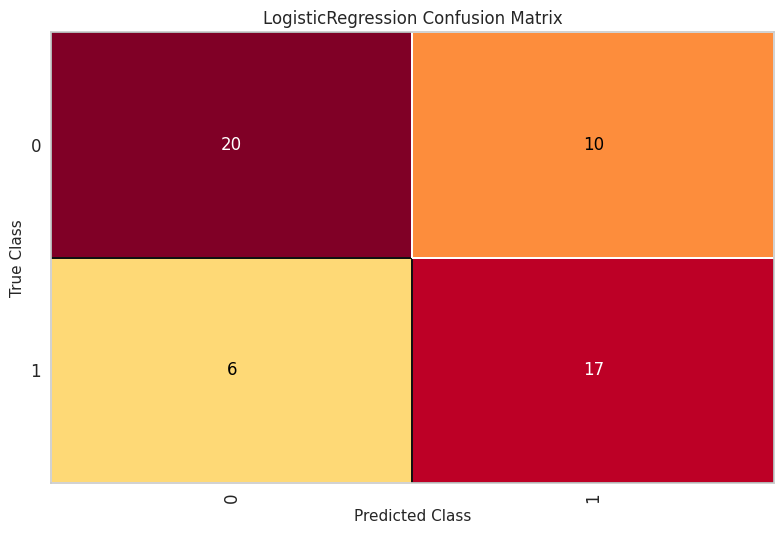

<AxesSubplot: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [16]:
model = LogisticRegression()
viz = ConfusionMatrix(model, classes=[0,1])

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

Сделать вывод о качестве модели.

## Комплексный отчет

Построить отчет о класификации для обучающей выборки.

In [17]:
from sklearn.metrics import classification_report

# Predict class for train set
y_train_pred = model.predict(X_train)

# Classification report
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       104
           1       0.70      0.80      0.75       108

    accuracy                           0.73       212
   macro avg       0.73      0.73      0.72       212
weighted avg       0.73      0.73      0.72       212



Построить отчет о класификации для тестовой выборки.

In [18]:
# Predict class for test set
y_test_pred = model.predict(X_test)

# Classification report
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.63      0.74      0.68        23

    accuracy                           0.70        53
   macro avg       0.70      0.70      0.70        53
weighted avg       0.71      0.70      0.70        53



Сделать вывод о качестве модели.

## ROC-кривая

Для обучающей выборки.

Вычислить метрики TPR и FPR с использованием библиотеки `sklearn`.

In [19]:
from sklearn.metrics import roc_curve

# Assuming you have the following variables
#   - y_train: true labels
#   - y_score: predicted probabilities

y_train = y_test  # replace with your actual true labels
y_score = model.predict_proba(X_test)[:, 1]  # replace with your actual predicted probabilities

fpr, tpr, _ = roc_curve(y_train, y_score)

Построить ROC-кривые для каждого класса.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

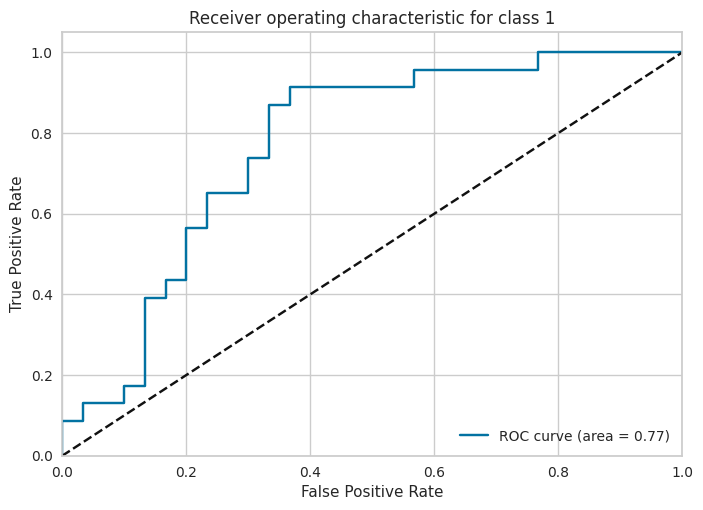

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

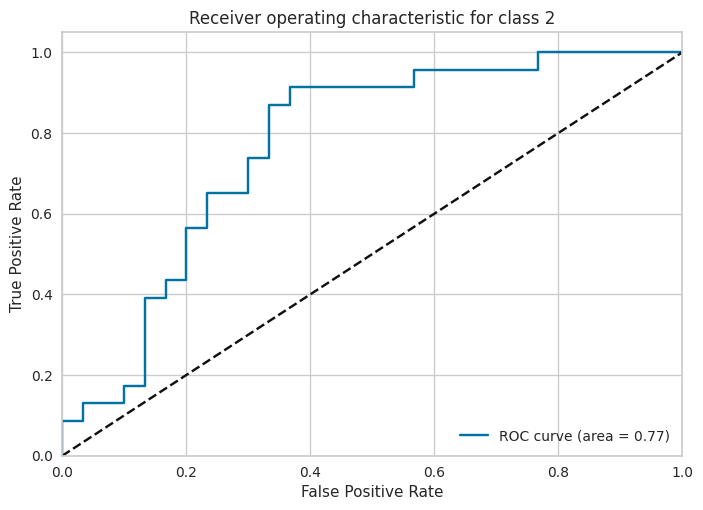

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define n_classes
n_classes = np.unique(y_train).shape[0]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# y_train and y_score must be 2D for multi-class problems. If they are not, we need to apply one-hot encoding.
# In this case y_train and y_score are 1-dimensional, so to avoid IndexError we don't need to slice them.

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class {}'.format(i+1))
    plt.legend(loc="lower right")
    plt.show()

Вычислить показатель AUC для каждого класса.

In [21]:
from sklearn.metrics import roc_auc_score

# Assuming you have y_true and y_score
# Calculate the AUC for each class
for i in range(n_classes):
    auc = roc_auc_score(y_train == i, y_score)
    print(f"AUC for class {i}: {auc}")

AUC for class 0: 0.23188405797101452
AUC for class 1: 0.7681159420289855


Для тестовой выборки.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

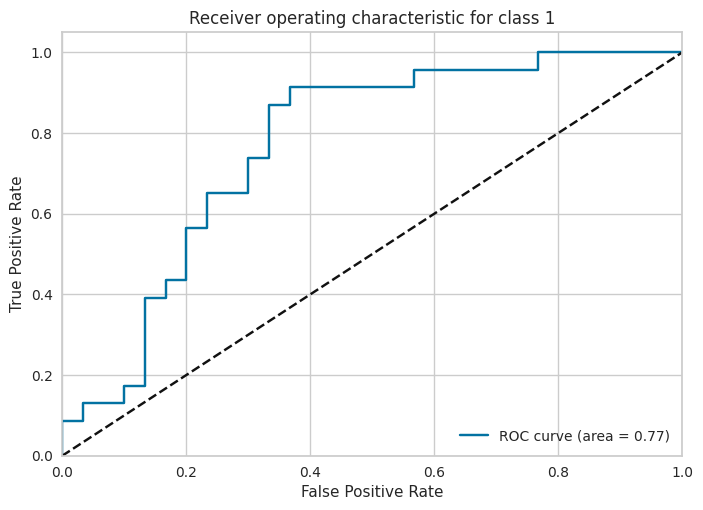

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

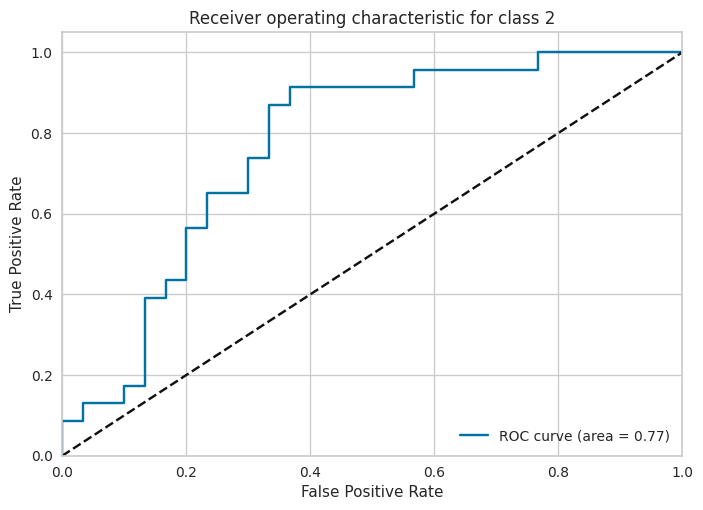

AUC for class 0: 0.23188405797101452
AUC for class 1: 0.7681159420289855


In [22]:
# Assuming the variable 'y_test' for the test set true labels
# And variable 'y_score_test' for the test set predicted probabilities

y_score_test = model.predict_proba(X_test)[:, 1]  # replace with your actual predicted probabilities

# Calculate TPR and FPR for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)

# Plot ROC curves for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class {}'.format(i+1))
    plt.legend(loc="lower right")
    plt.show()

# Calculate the AUC for each class
for i in range(n_classes):
    auc_test = roc_auc_score(y_test == i, y_score_test)
    print(f"AUC for class {i}: {auc_test}")

# Классификация новых объектов

Задать произвольный объект и осуществить его классификацию на основе построенной модели.

In [23]:
# Defining a new arbitrary object (Sample)
sample = [[3, 7]]

# Using the trained model to classify the sample
sample_pred = model.predict(sample)

print(f"The class of the object is {sample_pred[0]}")

The class of the object is 1


Вычислить вероятности принадлежности объекта к заданным классам.

In [24]:
# Predict probabilities of assignment to classes for the sample
sample_proba = model.predict_proba(sample)
  
print(f"Probability of the object belonging to classes: {sample_proba}")

Probability of the object belonging to classes: [[1.18863533e-04 9.99881136e-01]]


Вывести метку классу, к которому принадлежит объект.

In [25]:
# The predicted class label for the sample
print(f"The predicted class label for the object is: {sample_pred[0]}")

The predicted class label for the object is: 1


# Альтернативная модель логистической регрессии

Выбрать произвольный порядок полинома.

Записать уравнение полиномиальной модели регрессии с выбранным порядком полинома.

Сформировать соответствующие независимые признаки на данных обучающей выборки.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_poly, y_train)

LogisticRegression()

## Оценивание качества модели

### Матрица ошибок

С использованием класса `ConfusionMatrix` библиотеки `yellowbrick` построить матрицу ошибок для обучающей выборки.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

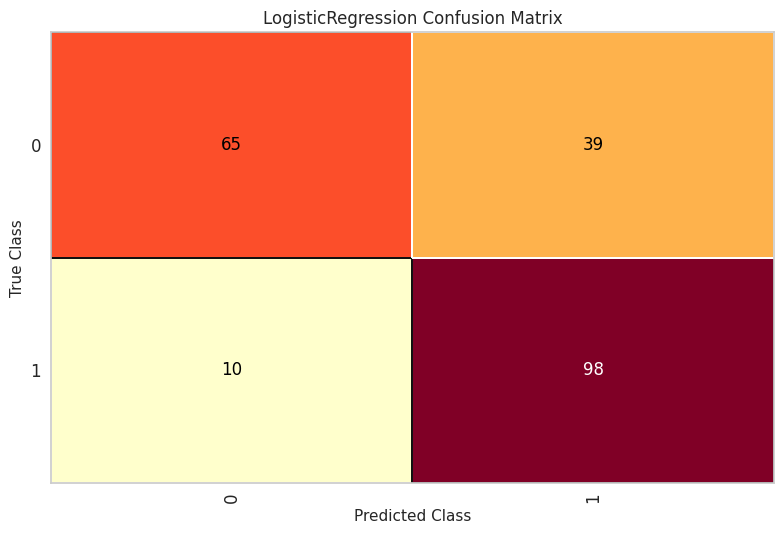

<AxesSubplot: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [31]:
from yellowbrick.classifier import ConfusionMatrix

# Fit the model with the Polynomial transformed training data then create the confusion matrix
model = LogisticRegression()
viz = ConfusionMatrix(model, classes=[0, 1])

viz.fit(X_train_poly, y_train)
viz.score(X_train_poly, y_train)
viz.show()

С использованием класса `ConfusionMatrix` библиотеки `yellowbrick` построить матрицу ошибок для тестовой выборки.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

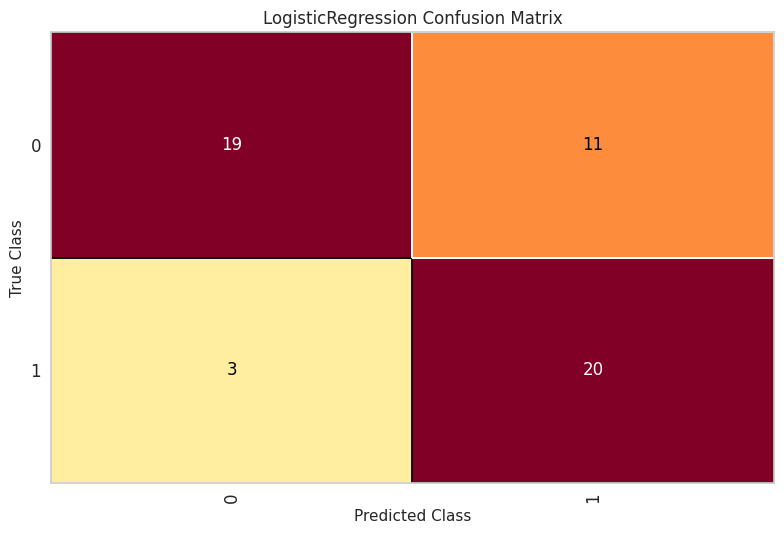

<AxesSubplot: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
X_test_poly = poly.transform(X_test)

model = LogisticRegression()
viz = ConfusionMatrix(model, classes=[0,1])

viz.fit(X_train_poly, y_train)
viz.score(X_test_poly, y_test)
viz.show()

Сделать вывод о качестве модели.

### Комплексный отчет

Построить отчет о класификации для обучающей выборки.

In [33]:
# Predict class for train set
y_train_pred = model.predict(X_train_poly)

# Classification report
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.62      0.73       104
           1       0.72      0.91      0.80       108

    accuracy                           0.77       212
   macro avg       0.79      0.77      0.76       212
weighted avg       0.79      0.77      0.76       212



Построить отчет о класификации для тестовой выборки.

In [34]:
# Predict class for test set
y_test_pred = model.predict(X_test_poly)

# Classification report
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        30
           1       0.65      0.87      0.74        23

    accuracy                           0.74        53
   macro avg       0.75      0.75      0.74        53
weighted avg       0.77      0.74      0.74        53



Сделать вывод о качестве модели.

### ROC-кривая

Для обучающей выборки.

Вычислить метрики TPR и FPR с использованием библиотеки `sklearn`.

In [35]:
from sklearn.metrics import roc_curve

# Assuming you have the following variables
#   - y_train_poly: true labels for polynomially transformed data
#   - y_score_poly: predicted probabilities for polynomially transformed data

# replace with your actual true labels and predicted probabilities
y_train_poly = y_train  
y_score_poly = model.predict_proba(X_train_poly)[:,1]  

fpr_poly, tpr_poly, _ = roc_curve(y_train_poly, y_score_poly)

Построить ROC-кривые для каждого класса.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

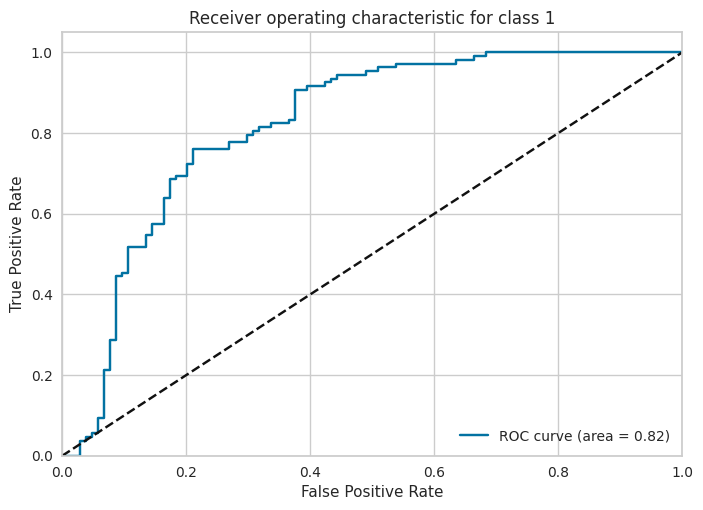

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

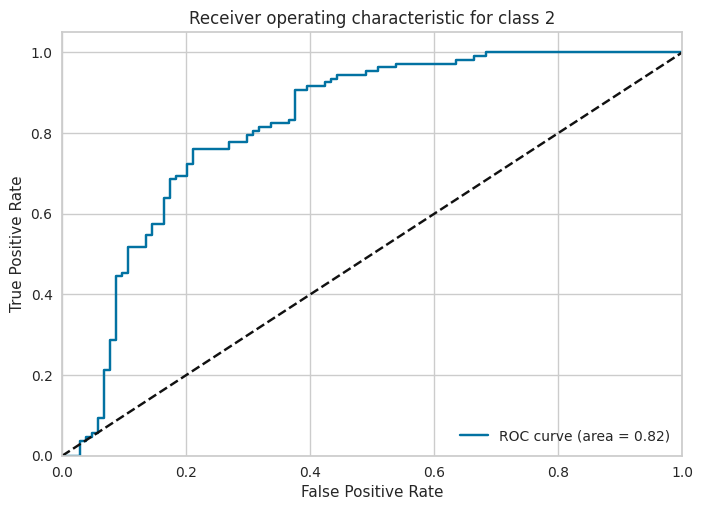

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define n_classes
n_classes = np.unique(y_train_poly).shape[0]

# Compute ROC curve and ROC area for each class
fpr_poly = dict()
tpr_poly = dict()
roc_auc_poly = dict()

# y_train_poly and y_score_poly must be 2D for multi-class problems. 
# If they are not, we need to apply one-hot encoding.
# In this case y_train_poly and y_score_poly are 1-dimensional, so to avoid IndexError we don't need to slice them.

for i in range(n_classes):
    fpr_poly[i], tpr_poly[i], _ = roc_curve(y_train_poly, y_score_poly)
    roc_auc_poly[i] = auc(fpr_poly[i], tpr_poly[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr_poly[i], tpr_poly[i], label='ROC curve (area = %0.2f)' % roc_auc_poly[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class {}'.format(i+1))
    plt.legend(loc="lower right")
    plt.show()

Вычислить показатель AUC для каждого класса.

In [37]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC for each class
for i in range(n_classes):
    auc_poly = roc_auc_score(y_train_poly == i, y_score_poly)
    print(f"AUC for class {i}: {auc_poly}")

AUC for class 0: 0.17948717948717946
AUC for class 1: 0.8205128205128205


Для тестовой выборки.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

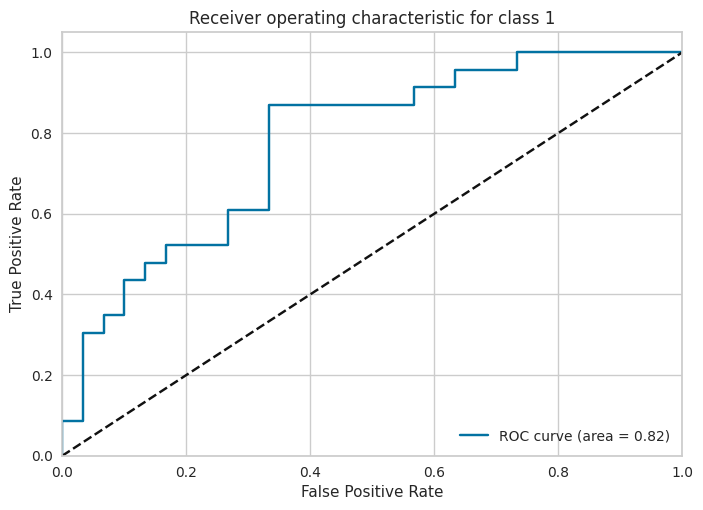

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

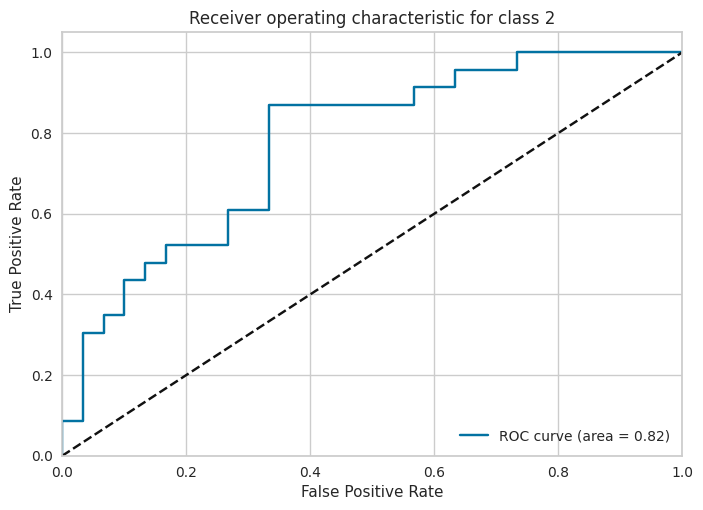

AUC for class 0: 0.2260869565217391
AUC for class 1: 0.7739130434782608


In [38]:
# Assuming the variable 'y_test' for the test set true labels
# And variable 'y_score_test_poly' for the test set predicted probabilities
# For polynomially transformed data

y_score_test_poly = model.predict_proba(X_test_poly)[:,1]   # replace with your actual predicted probabilities

# Calculate TPR and FPR for the test set
fpr_test_poly, tpr_test_poly, _ = roc_curve(y_test, y_score_test_poly)

# Plot ROC curves for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr_test_poly, tpr_test_poly, label='ROC curve (area = %0.2f)' % roc_auc_poly[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class {}'.format(i+1))
    plt.legend(loc="lower right")
    plt.show()

# Calculate the AUC for each class
for i in range(n_classes):
    auc_test_poly = roc_auc_score(y_test == i, y_score_test_poly)
    print(f"AUC for class {i}: {auc_test_poly}")

Сделать вывод о качестве модели с выбранным порядком полинома.

Изменить порядок полинома (уменьшить или увеличить) и повторить процедуру обучения модели полиномиальной регрессии.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [40]:
# Let's choose a higher order for the polynomial for example 3 (incrementing by one from prior order)
poly = PolynomialFeatures(degree = 3)

# Transform both training and test sets
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#create new model for polynomial regression of order 3
model_poly = LogisticRegression()

# Fit the model with polynomial features
model_poly.fit(X_train_poly, y_train)

LogisticRegression()

Оценить качество полученной модели и сделать вывод о более предпочтительном порядке полинома.

In [41]:
# Predict class for train set and test set
y_train_pred_poly = model_poly.predict(X_train_poly)
y_test_pred_poly = model_poly.predict(X_test_poly)

# Classification report
train_report = classification_report(y_train, y_train_pred_poly)
test_report = classification_report(y_test, y_test_pred_poly)

print(f"Train set report:\n{train_report}\nTest set report:\n{test_report}")

# Score computation
train_score = model_poly.score(X_train_poly, y_train)
test_score = model_poly.score(X_test_poly, y_test)

print(f"Train set score: {train_score}\nTest set score: {test_score}")

# ROC AUC computation
y_train_score = model_poly.predict_proba(X_train_poly)[:,1]   
y_test_score = model_poly.predict_proba(X_test_poly)[:,1]   

train_auc = roc_auc_score(y_train, y_train_score)
test_auc = roc_auc_score(y_test, y_test_score)

print(f"Train set AUC: {train_auc}\nTest set AUC: {test_auc}")

#Final statement
if test_score > train_score:
  print("The polynomial order is just right for this model")
elif train_score > test_score:
  print("The polynomial order is too high for this model, overfitting might have occured")
else:
  print("The polynomial order is too low for this model, underfitting might have occured")

Train set report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       104
           1       0.72      0.87      0.79       108

    accuracy                           0.76       212
   macro avg       0.77      0.76      0.76       212
weighted avg       0.77      0.76      0.76       212

Test set report:
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.62      0.87      0.73        23

    accuracy                           0.72        53
   macro avg       0.74      0.73      0.72        53
weighted avg       0.76      0.72      0.72        53

Train set score: 0.7594339622641509
Test set score: 0.7169811320754716
Train set AUC: 0.8363603988603989
Test set AUC: 0.7999999999999999
The polynomial order is too high for this model, overfitting might have occured


Сравнить качество линейной и полиномиальной моделей логистической регрессии.

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = LogisticRegression()
model.fit(X_train, y_train)

# Assuming 'model' is the previously defined linear model
y_pred_linear = model.predict(X_test)

# Аlter the input data to the polynomial model
X_test_poly = poly.transform(X_test)

# Assuming 'model_poly' is the previously defined polynomial model
y_pred_poly = model_poly.predict(X_test_poly)

# Линейная модель
print("Линейная модель:")
print("Accuracy: ", accuracy_score(y_test, y_pred_linear))
print("Precision: ", precision_score(y_test, y_pred_linear))
print("Recall: ", recall_score(y_test, y_pred_linear))
print("F1 Score: ", f1_score(y_test, y_pred_linear))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_linear))

# Полиномиальная модель
print("\\nПолиномиальная модель:")
print("Accuracy: ", accuracy_score(y_test, y_pred_poly))
print("Precision: ", precision_score(y_test, y_pred_poly))
print("Recall: ", recall_score(y_test, y_pred_poly))
print("F1 Score: ", f1_score(y_test, y_pred_poly))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_poly))

Линейная модель:
Accuracy:  0.6981132075471698
Precision:  0.6296296296296297
Recall:  0.7391304347826086
F1 Score:  0.68
ROC AUC Score:  0.7028985507246377
\nПолиномиальная модель:
Accuracy:  0.7169811320754716
Precision:  0.625
Recall:  0.8695652173913043
F1 Score:  0.7272727272727273
ROC AUC Score:  0.7347826086956522


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4cde2ac7-b4c7-4a5e-aa7c-acbf9451ff5b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>